<a href="https://colab.research.google.com/github/bayuyap/Clustering_DealerKendaraan/blob/main/Tugas_Besar_01_1301194147_Andhika_Bayu_Yudhistira_Arda_Putra_IF_43_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT dan Read Dataset

In [ ]:
import numpy as nm
import pandas as pd
import random as rd
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_test = pd.read_csv('kendaraan_test.csv')
df_train = pd.read_csv('kendaraan_train.csv')

In [ ]:
df_test

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,Pria,61,1,46,0,> 2 Tahun,Pernah,31039,124,67,0
47635,Pria,41,1,15,0,1-2 Tahun,Pernah,2630,157,232,0
47636,Pria,24,1,29,1,< 1 Tahun,Tidak,33101,152,211,0
47637,Pria,59,1,30,0,1-2 Tahun,Pernah,37788,26,239,1


In [ ]:
df_train

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Jenis_Kelamin      47639 non-null  object
 1   Umur               47639 non-null  int64 
 2   SIM                47639 non-null  int64 
 3   Kode_Daerah        47639 non-null  int64 
 4   Sudah_Asuransi     47639 non-null  int64 
 5   Umur_Kendaraan     47639 non-null  object
 6   Kendaraan_Rusak    47639 non-null  object
 7   Premi              47639 non-null  int64 
 8   Kanal_Penjualan    47639 non-null  int64 
 9   Lama_Berlangganan  47639 non-null  int64 
 10  Tertarik           47639 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 4.0+ MB


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


# PREPROCESSING DATA

## Drop Beberapa Kolom

In [ ]:
preprocess_test = df_test.drop(["Kode_Daerah","Jenis_Kelamin"],axis=1, inplace=True)
preprocess_train = df_train.drop(["id","Kode_Daerah","Jenis_Kelamin"],axis=1, inplace=True)

In [ ]:
df_test

,Umur,SIM,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,49,1,0,1-2 Tahun,Pernah,46963,26,145,0
1,22,1,1,< 1 Tahun,Tidak,39624,152,241,0
2,24,1,1,< 1 Tahun,Tidak,110479,152,62,0
3,46,1,1,1-2 Tahun,Tidak,36266,124,34,0
4,35,1,0,1-2 Tahun,Pernah,26963,152,229,0
...,...,...,...,...,...,...,...,...,...
47634,61,1,0,> 2 Tahun,Pernah,31039,124,67,0
47635,41,1,0,1-2 Tahun,Pernah,2630,157,232,0
47636,24,1,1,< 1 Tahun,Tidak,33101,152,211,0
47637,59,1,0,1-2 Tahun,Pernah,37788,26,239,1


In [ ]:
df_train

,Umur,SIM,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,30.0,1.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,48.0,1.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,21.0,1.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,58.0,1.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,50.0,1.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...
285826,23.0,1.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,21.0,1.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,23.0,1.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,68.0,1.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


## Pengecekan dan Drop data duplikat

In [ ]:
df_test.drop_duplicates(inplace = True)

df_test

,Umur,SIM,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,49,1,0,1-2 Tahun,Pernah,46963,26,145,0
1,22,1,1,< 1 Tahun,Tidak,39624,152,241,0
2,24,1,1,< 1 Tahun,Tidak,110479,152,62,0
3,46,1,1,1-2 Tahun,Tidak,36266,124,34,0
4,35,1,0,1-2 Tahun,Pernah,26963,152,229,0
...,...,...,...,...,...,...,...,...,...
47634,61,1,0,> 2 Tahun,Pernah,31039,124,67,0
47635,41,1,0,1-2 Tahun,Pernah,2630,157,232,0
47636,24,1,1,< 1 Tahun,Tidak,33101,152,211,0
47637,59,1,0,1-2 Tahun,Pernah,37788,26,239,1


In [ ]:
df_train.drop_duplicates(inplace = True)

df_train

,Umur,SIM,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,30.0,1.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,48.0,1.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,21.0,1.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,58.0,1.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,50.0,1.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...
285826,23.0,1.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,21.0,1.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,23.0,1.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,68.0,1.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


## Pengecekan Data Yang Kosong

In [ ]:
df_test.isnull().sum()

Umur                 0
SIM                  0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [ ]:
df_train.isnull().sum()

Umur                 13948
SIM                  14378
Sudah_Asuransi       14198
Umur_Kendaraan       14245
Kendaraan_Rusak      14154
Premi                13245
Kanal_Penjualan      14236
Lama_Berlangganan    12873
Tertarik                 0
dtype: int64

## Mengisi data yang kosong

In [ ]:
df_train = df_train.fillna(df_train.median())
df_train['SIM'] = df_train['SIM'].fillna(df_train['SIM'].value_counts().index[0])
df_train['Umur_Kendaraan'] = df_train['Umur_Kendaraan'].fillna(df_train['Umur_Kendaraan'].value_counts().index[0])
df_train['Sudah_Asuransi'] = df_train['Sudah_Asuransi'].fillna(df_train['Sudah_Asuransi'].value_counts().index[0])
df_train['Kendaraan_Rusak'] = df_train['Kendaraan_Rusak'].fillna(df_train['Kendaraan_Rusak'].value_counts().index[0])
df_train['Premi'] = df_train['Premi'].fillna(df_train['Premi'].value_counts().index[0])
df_train['Lama_Berlangganan'] = df_train['Lama_Berlangganan'].fillna(df_train['Lama_Berlangganan'].value_counts().index[0])

df_train

,Umur,SIM,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,30.0,1.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,48.0,1.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,21.0,1.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,58.0,1.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,50.0,1.0,0.0,> 2 Tahun,Pernah,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...
285826,23.0,1.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,21.0,1.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,23.0,1.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,68.0,1.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


##Encoding dan Mapping Dataset

In [ ]:
df_test['Kendaraan_Rusak'] = LabelEncoder().fit_transform(df_test['Kendaraan_Rusak'])
sizeMapping = {'< 1 Tahun':1, '1-2 Tahun':2, '> 2 Tahun':3}
df_test['Umur_Kendaraan'] = df_test['Umur_Kendaraan'].map(sizeMapping)
df_test

,Umur,SIM,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,49,1,0,2,0,46963,26,145,0
1,22,1,1,1,1,39624,152,241,0
2,24,1,1,1,1,110479,152,62,0
3,46,1,1,2,1,36266,124,34,0
4,35,1,0,2,0,26963,152,229,0
...,...,...,...,...,...,...,...,...,...
47634,61,1,0,3,0,31039,124,67,0
47635,41,1,0,2,0,2630,157,232,0
47636,24,1,1,1,1,33101,152,211,0
47637,59,1,0,2,0,37788,26,239,1


In [ ]:
df_train['Kendaraan_Rusak'] = LabelEncoder().fit_transform(df_train['Kendaraan_Rusak'])
sizeMapping = {'< 1 Tahun':1, '1-2 Tahun':2, '> 2 Tahun':3}
df_train['Umur_Kendaraan'] = df_train['Umur_Kendaraan'].map(sizeMapping)
df_train

,Umur,SIM,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,30.0,1.0,1.0,1,1,28029.0,152.0,97.0,0
1,48.0,1.0,0.0,3,0,25800.0,29.0,158.0,0
2,21.0,1.0,1.0,1,1,32733.0,160.0,119.0,0
3,58.0,1.0,0.0,2,1,2630.0,124.0,63.0,0
4,50.0,1.0,0.0,3,0,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...
285826,23.0,1.0,1.0,1,1,25988.0,152.0,217.0,0
285827,21.0,1.0,1.0,1,1,44686.0,152.0,50.0,0
285828,23.0,1.0,1.0,1,1,49751.0,152.0,226.0,0
285829,68.0,1.0,1.0,2,1,30503.0,124.0,270.0,0


## Mencari Korelasi Antar Data Dengan Heatmap

In [ ]:
correlation_train = df_train.corr()
correlation_test = df_test.corr()
correlation_test

,Umur,SIM,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
Umur,1.000000,-0.079825,-0.247812,0.766229,-0.259840,0.077422,-0.580053,-0.002278,0.109871
SIM,-0.079825,1.000000,0.012282,-0.042956,0.011989,-0.010090,0.048117,-0.003981,0.014357
Sudah_Asuransi,-0.247812,0.012282,1.000000,-0.376424,0.822727,0.002263,0.208065,-0.002881,-0.341351
Umur_Kendaraan,0.766229,-0.042956,-0.376424,1.000000,-0.391540,0.050173,-0.549392,0.002494,0.217321
Kendaraan_Rusak,-0.259840,0.011989,0.822727,-0.391540,1.000000,-0.011458,0.212931,-0.003759,-0.354546
Premi,0.077422,-0.010090,0.002263,0.050173,-0.011458,1.000000,-0.122238,-0.005407,0.015274
Kanal_Penjualan,-0.580053,0.048117,0.208065,-0.549392,0.212931,-0.122238,1.000000,-0.000343,-0.136043
Lama_Berlangganan,-0.002278,-0.003981,-0.002881,0.002494,-0.003759,-0.005407,-0.000343,1.000000,0.006456
Tertarik,0.109871,0.014357,-0.341351,0.217321,-0.354546,0.015274,-0.136043,0.006456,1.000000


In [ ]:
correlation_train

,Umur,SIM,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
Umur,1.000000,-0.075306,-0.233531,0.716806,-0.245914,0.054290,-0.544881,0.000303,0.104685
SIM,-0.075306,1.000000,0.015145,-0.034309,0.016353,-0.009832,0.041056,-0.001222,0.009601
Sudah_Asuransi,-0.233531,0.015145,1.000000,-0.345710,0.746562,0.009755,0.203326,0.002527,-0.326521
Umur_Kendaraan,0.716806,-0.034309,-0.345710,1.000000,-0.360748,0.027888,-0.512747,-0.002212,0.211505
Kendaraan_Rusak,-0.245914,0.016353,0.746562,-0.360748,1.000000,-0.003977,0.207627,0.000880,-0.338491
Premi,0.054290,-0.009832,0.009755,0.027888,-0.003977,1.000000,-0.101897,-0.000459,0.017940
Kanal_Penjualan,-0.544881,0.041056,0.203326,-0.512747,0.207627,-0.101897,1.000000,0.000100,-0.135722
Lama_Berlangganan,0.000303,-0.001222,0.002527,-0.002212,0.000880,-0.000459,0.000100,1.000000,-0.002311
Tertarik,0.104685,0.009601,-0.326521,0.211505,-0.338491,0.017940,-0.135722,-0.002311,1.000000


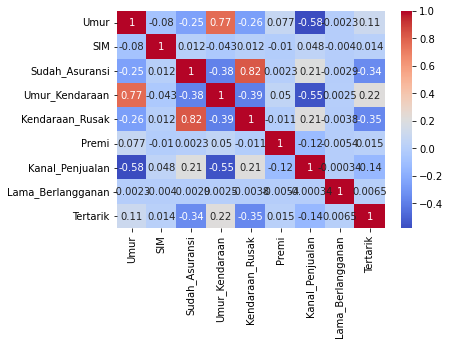

In [ ]:
sns.heatmap(correlation_test, annot= True, cmap='coolwarm', xticklabels=correlation_test.columns, yticklabels=correlation_test.columns)

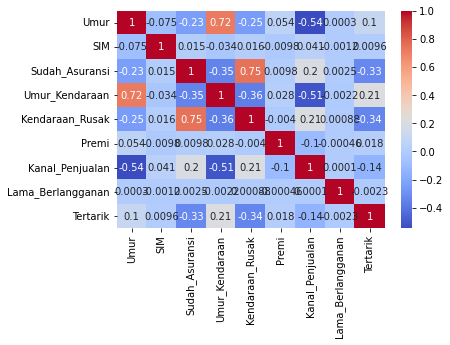

In [ ]:
sns.heatmap(correlation_train, annot=True, cmap='coolwarm', xticklabels=correlation_train.columns, yticklabels=correlation_train.columns)

# Implementasi K-Means untuk Clustering

## Inisialisasi data

In [ ]:
dataTest = df_test.loc[:,['Kanal_Penjualan','Lama_Berlangganan']]
dataTrain = df_train.loc[:,['Kanal_Penjualan','Lama_Berlangganan']]
dataTestArray = dataTest.values
dataTrainArray = dataTrain.values
dataTestArray = dataTestArray[:500]
dataTrainArray = dataTrainArray[:500]
dataTest = dataTest[:500]
dataTrain = dataTrain[:500]

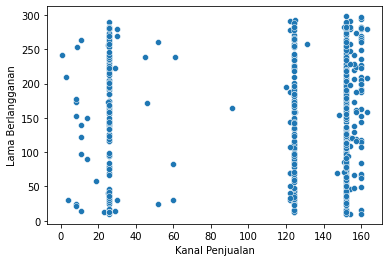

In [ ]:
sns.scatterplot(dataTestArray[:,0], dataTestArray[:,1])

plt.xlabel('Kanal Penjualan')
plt.ylabel('Lama Berlangganan')
plt.show()

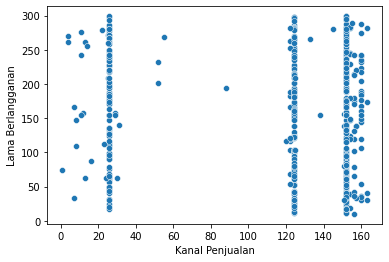

In [ ]:
sns.scatterplot(dataTrainArray[:,0], dataTrainArray[:,1])

plt.xlabel('Kanal Penjualan')
plt.ylabel('Lama Berlangganan')
plt.show()

# K-Means

## Mencari Cost

In [ ]:
def calculate_cost(dataArray, centroids, cluster):
  sum = 0
  for i, val in enumerate(dataArray):
      sum += nm.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 + (centroids[int(cluster[i]), 1]-val[1])**2)
  
  return sum

## Implementasi K-Means

In [ ]:
def kmeans(dataArray, k, dataSet):
  
  diff = 1
  cluster = nm.zeros(dataArray.shape[0])

  
  #Generate centroids
  centroids = dataSet.sample(n = k).values

  # Looping selama data belum konvergen
  while diff:

    #Untuk Setiap Baris Data
    for i, row in enumerate(dataArray):
     
      mn_dist = float('inf')

      #Looping di tiap centroid
      for idx, centroid in enumerate(centroids):
        #Menghitung Jarak dengan Euclidean Distance
        distance = nm.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)

        # Distribusi ke centroid terdekat
        if mn_dist > distance:
          mn_dist = distance
          cluster[i] = idx

    new_centroids = pd.DataFrame(dataArray).groupby(by=cluster).mean().values

    #Jika seluruh data telah konvergen maka looping selesai
    if nm.count_nonzero(centroids-new_centroids) == 0:
      diff = 0
    else:
      centroids = new_centroids
  #Mengembalikan nilai centroid dan banyak cluster    
  return centroids, cluster  

# Output

In [ ]:
k = 6
centroids_dataTest, cluster_dataTest = kmeans(dataTestArray, k, dataTest)

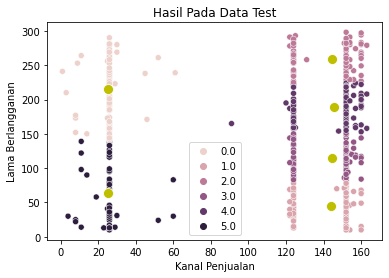

In [ ]:
sns.scatterplot(dataTestArray[:,0], dataTestArray[:, 1], hue=cluster_dataTest)
sns.scatterplot(centroids_dataTest[:,0], centroids_dataTest[:, 1], s=100, color='y')
plt.title('Hasil Pada Data Test')
plt.xlabel('Kanal Penjualan')
plt.ylabel('Lama Berlangganan')
plt.show()

In [ ]:
k = 8
centroids_dataTrain, cluster_dataTrain = kmeans(dataTrainArray, k,dataTrain)

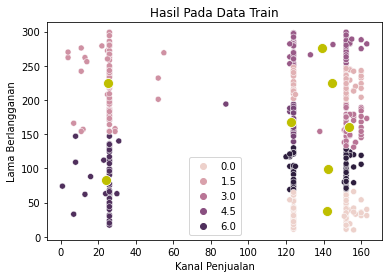

In [ ]:
sns.scatterplot(dataTrainArray[:,0], dataTrainArray[:, 1], hue=cluster_dataTrain)
sns.scatterplot(centroids_dataTrain[:,0], centroids_dataTrain[:, 1], s=100, color='y')
plt.title('Hasil Pada Data Train')
plt.xlabel('Kanal Penjualan')
plt.ylabel('Lama Berlangganan')
plt.show()

# Mencari Nilai K dengan elbow method dan WCSS

In [ ]:
cost_list_test = []

for k in range(1, 10):
  
  centroids_dataTest, cluster_dataTest = kmeans(dataTestArray, k, dataTest)
  
  
  cost = calculate_cost(dataTestArray, centroids_dataTest, cluster_dataTest)
  cost_list_test.append(cost)

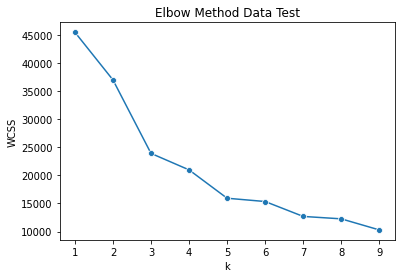

In [ ]:
sns.lineplot(x=range(1,10), y=cost_list_test, marker='o')
plt.title('Elbow Method Data Test')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

In [ ]:
cost_list_train = []

for k in range(1, 10):
  
  centroids_dataTrain, cluster_dataTrain = kmeans(dataTrainArray, k, dataTrain)
  
  # WCSS (Within cluster sum of square)
  cost = calculate_cost(dataTrainArray, centroids_dataTrain, cluster_dataTrain)
  cost_list_train.append(cost)

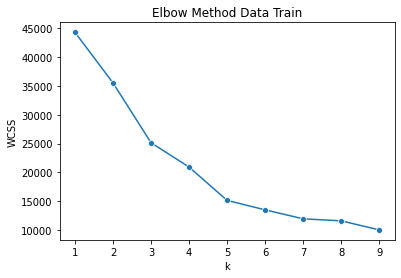

In [ ]:
sns.lineplot(x=range(1,10), y=cost_list_train, marker='o')
plt.title('Elbow Method Data Train')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()